<a href="https://colab.research.google.com/github/AlirezaMohammadzadeh/Data-mining-course-/blob/main/Adult_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# Code

**Import Libraries**

In [1]:
"""
Data Mining (Dr. Shakeri)
Project 2 (TA)
Group ID: 15
Group Members: Alireza Mohamadzadeh 9913024, 
               Javad Fazli 9913019,
               Pouria Alimoradpor 9912035
"""
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
!gdown 1aWsBqY0-6-hrDF36CQGu1noGg71_daus  #Train
!gdown 1QdyrEeztAKy16BN2h_h2hwtN-AN0xLGE  #Test

Downloading...
From: https://drive.google.com/uc?id=1aWsBqY0-6-hrDF36CQGu1noGg71_daus
To: /content/Adult_TrainDataset.csv
100% 3.55M/3.55M [00:00<00:00, 100MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QdyrEeztAKy16BN2h_h2hwtN-AN0xLGE
To: /content/Adult_TestDataset.csv
100% 1.78M/1.78M [00:00<00:00, 104MB/s]


**Read Dataset**

In [3]:
df_train = pd.read_csv("/content/Adult_TrainDataset.csv")
df_test = pd.read_csv("/content/Adult_TestDataset.csv")

In [4]:
df_train['Set'] = 'Train'
df_test['Set'] = 'Test'

# Concatenate the DataFrames vertically
combined_df = pd.concat([df_train, df_test], ignore_index=True)

In [5]:
combined_df

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income,Set
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Train
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Train
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Train
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Train
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,Test
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K,Test
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,Test
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,Test


In [6]:
combined_df.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income,Set
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Train
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Train
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Train
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Train
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Train


In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               48842 non-null  int64 
 1   Work_Class        48842 non-null  object
 2   Final_Weight      48842 non-null  int64 
 3   Education         48842 non-null  object
 4   Education-Number  48842 non-null  int64 
 5   Marital_Status    48842 non-null  object
 6   Occupation        48842 non-null  object
 7   Relationship      48842 non-null  object
 8   Race              48842 non-null  object
 9   Sex               48842 non-null  object
 10  Capital_Gain      48842 non-null  int64 
 11  Capital_Loss      48842 non-null  int64 
 12  Hours-Per-Week    48842 non-null  int64 
 13  Native_Country    48842 non-null  object
 14  Income            48842 non-null  object
 15  Set               48842 non-null  object
dtypes: int64(6), object(10)
memory usage: 6.0+ MB


In [8]:
combined_df.describe()

,Age,Final_Weight,Education-Number,Capital_Gain,Capital_Loss,Hours-Per-Week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Pre-Process**

In [9]:
# Checking null values, if any
combined_df.isnull().sum()

Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
Set                 0
dtype: int64

#Checking NULL values

In [10]:
#Get unique values Age
unique_age = combined_df['Age'].unique()
print(unique_age)

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


In [11]:
#Get unique values Work Class
unique_Work_Class = combined_df['Work_Class'].unique()
print(unique_Work_Class)

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [12]:
#Get percentage of ? value
count = (combined_df['Work_Class'] == '?').sum()
percentage = (combined_df['Work_Class']=='?').mean()*100
print(count)
print(f"{percentage:.2f}%")

2799
5.73%


In [13]:
#Get percentage of most common value
value_count = combined_df['Work_Class'].value_counts()
most_common = value_count.idxmax()
most_common_count = value_count[most_common]
total = len(combined_df['Work_Class'])
percentage_most = most_common_count/total
print(percentage_most)
#Inplace ? value with most common vlaue
combined_df['Work_Class'].replace('?',most_common,inplace = True)

0.6941976168052086


In [14]:
#Get unique values Final Weight
unique_final_weight = combined_df['Final_Weight'].unique()
print(unique_final_weight)

[ 77516  83311 215646 ... 173449  89686 350977]


In [15]:
#Get unique values Education
unique_Education = combined_df['Education'].unique()
print(unique_Education)

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


In [16]:
#Get unique values Education Number
unique_Education_Number = combined_df['Education-Number'].unique()
print(unique_Education_Number)
#drop Education column
combined_df = combined_df.drop('Education', axis=1)

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


In [17]:
#Get unique values Marital satus
unique_Marital_Status = combined_df['Marital_Status'].unique()
print(unique_Marital_Status)

['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


In [18]:
#Get unique values Occupation
unique_Occupation = combined_df['Occupation'].unique()
print(unique_Occupation)

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


In [19]:
#Get percentage ? values
count = (combined_df['Occupation'] == '?').sum()
percentage = (combined_df['Occupation']=='?').mean()*100
print(count)
print(f"{percentage:.2f}%")

2809
5.75%


In [20]:
#Get percentage of most common value
value_count = combined_df['Occupation'].value_counts()
most_common = value_count.idxmax()
most_common_count = value_count[most_common]
total = len(combined_df['Occupation'])
percentage_most = most_common_count/total
print(percentage_most)
#Inplace ? value with most common vlaue
combined_df['Occupation'].replace('?',most_common,inplace = True)

0.1263666516522665


In [21]:
unique_Relation = combined_df['Relationship'].unique()
print(unique_Relation)

['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


In [22]:
unique_Race = combined_df['Race'].unique()
print(unique_Race)

['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']


In [23]:
unique_sex = combined_df['Sex'].unique()
print(unique_sex)

['Male' 'Female']


In [24]:
unique_Capital_Gain = combined_df['Capital_Gain'].unique()
print(unique_Capital_Gain)

[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848
  3887  5721  9562  1455  2036  1831 11678  2936  2993  7443  6360  1797
  1173  4687  6723  2009  6097  2653  1639 18481  7978  2387  5060  1264
  7262  1731  6612]


In [25]:
unique_Capital_Loss = combined_df['Capital_Loss'].unique()
print(unique_Capital_Loss)

[   0 2042 1408 1902 1573 1887 1719 1762 1564 2179 1816 1980 1977 1876
 1340 2206 1741 1485 2339 2415 1380 1721 2051 2377 1669 2352 1672  653
 2392 1504 2001 1590 1651 1628 1848 1740 2002 1579 2258 1602  419 2547
 2174 2205 1726 2444 1138 2238  625  213 1539  880 1668 1092 1594 3004
 2231 1844  810 2824 2559 2057 1974  974 2149 1825 1735 1258 2129 2603
 2282  323 4356 2246 1617 1648 2489 3770 1755 3683 2267 2080 2457  155
 3900 2201 1944 2467 2163 2754 2472 1411 1429 3175 1510 1870 1911 2465
 1421]


In [26]:
unique_Hours_Per_Week = combined_df['Hours-Per-Week'].unique()
print(unique_Hours_Per_Week)

[40 13 16 45 50 80 30 35 60 20 52 44 15 25 38 43 55 48 58 32 70  2 22 56
 41 28 36 24 46 42 12 65  1 10 34 75 98 33 54  8  6 64 19 18 72  5  9 47
 37 21 26 14  4 59  7 99 53 39 62 57 78 90 66 11 49 84  3 17 68 27 85 31
 51 77 63 23 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61 74 95 79 69]


In [27]:
unique_Native_Country = combined_df['Native_Country'].unique()
print(unique_Native_Country)

['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


In [28]:
count = (combined_df['Native_Country'] == '?').sum()
percentage = (combined_df['Native_Country']=='?').mean()*100
print(count)
print(f"{percentage:.2f}%")

857
1.75%


In [29]:
value_count = combined_df['Native_Country'].value_counts()
print(value_count)
most_common = value_count.idxmax()
most_common_count = value_count[most_common]
total = len(combined_df['Native_Country'])
percentage_most = most_common_count/total
print(percentage_most)

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [30]:
combined_df['Native_Country'].replace('?',most_common,inplace = True)

In [31]:
unique_Income = combined_df['Income'].unique()
print(unique_Income)

['<=50K' '>50K']


##We replaced all columns and replace NULL values with proper values

In [32]:
combined_df.head()

,Age,Work_Class,Final_Weight,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income,Set
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Train
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Train
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Train
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Train
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Train


In [33]:
for col in combined_df:
    print(combined_df[col].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[ 77516  83311 215646 ... 173449  89686 350977]
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
[ 2174     0 14084  5178  5013  2407 14344 15

**Data Visualization**

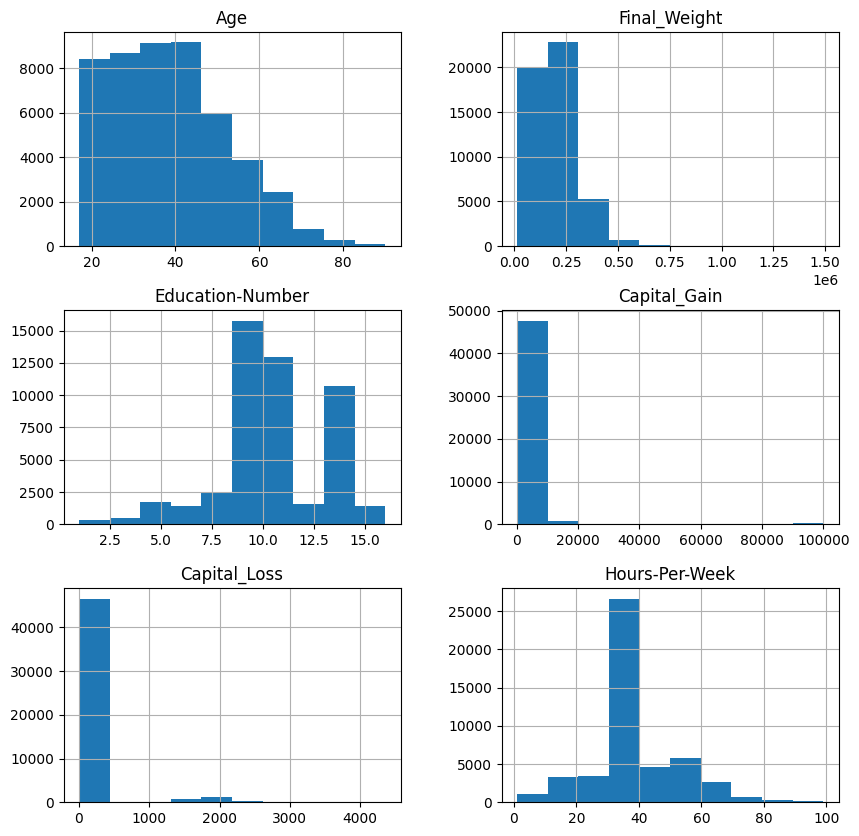

In [35]:
# Plot a histogram of the features
combined_df.hist(figsize=(10,10))
plt.show()

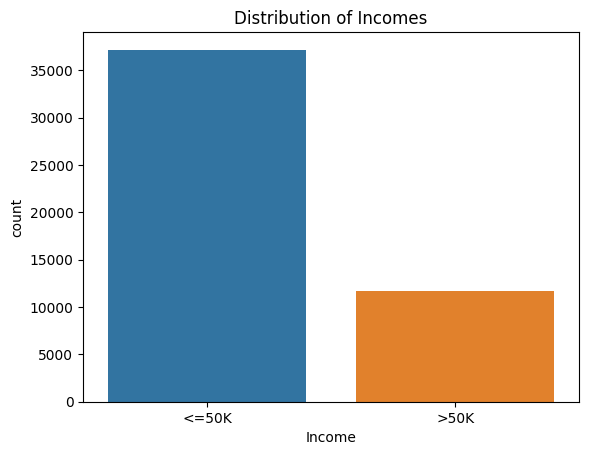

In [36]:
# Check the distribution of the target variable
sns.countplot(x='Income', data=combined_df)
plt.title('Distribution of Incomes')
plt.show()

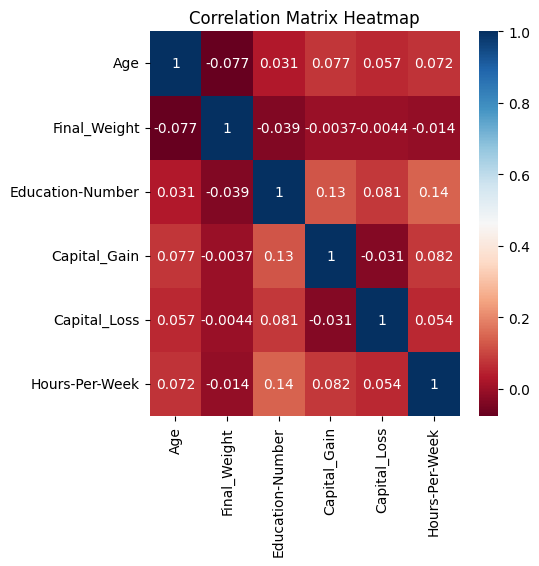

In [37]:
# Plot a correlation matrix of the features
plt.figure(figsize=(5,5))
sns.heatmap(combined_df.corr(numeric_only=True), cbar=True, annot=True, cmap='RdBu')
plt.title('Correlation Matrix Heatmap')
plt.show()

#Encoding

#Differences between One hot Encoding and Label Encoding

Both one-hot encoding and label encoding are techniques used to represent categorical data as numerical data in machine learning models. However, they differ in the way they represent the data and the types of models they can be used with.

One-hot encoding creates a new binary column for each category in the categorical variable. The value of each column is either 1 or 0 depending on whether or not that category is present for a given observation. For example, if we have a categorical variable "color" with categories "red", "blue", and "green", one-hot encoding would create three new columns "color_red", "color_blue", and "color_green", each with a value of 1 or 0 indicating whether that color is present for each observation.

One-hot encoding is useful for categorical variables with no inherent order or hierarchy, such as color, shape, or product type. It is also useful for models that assume that each category is independent of the others, such as logistic regression or decision trees.

Label encoding, on the other hand, assigns a numerical value to each category in the categorical variable. The values are assigned based on the order or hierarchy of the categories, with higher values representing higher ranks or importance. For example, if we have a categorical variable "size" with categories "small", "medium", and "large", label encoding might assign values of 0, 1, and 2, respectively.

Label encoding is useful for categorical variables with an inherent order or hierarchy, such as size, age groups, or education levels. It is also useful for models that assume that there is a linear relationship between the numerical values and the outcome variable, such as linear regression or support vector machines.

One potential drawback of label encoding is that it can introduce unintended relationships or biases into the data. For example, if we label encode "education level" with values 0-4 representing "elementary school", "middle school", "high school", "college", and "graduate school", respectively, the resulting values imply a linear relationship between education level and the outcome variable that may not be accurate. One-hot encoding avoids this issue by representing each category as independent of the others.

In [38]:
for col in combined_df.columns:
  print(col)

Age
Work_Class
Final_Weight
Education-Number
Marital_Status
Occupation
Relationship
Race
Sex
Capital_Gain
Capital_Loss
Hours-Per-Week
Native_Country
Income
Set


One-hot encoding is useful for categorical variables with no inherent order or hierarchy and our categorial columns are in this type

In [39]:
#get categorial columns
cat_cols = ['Work_Class', 'Marital_Status', 'Occupation','Relationship','Race','Sex','Native_Country']
# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

# Encode the categorical columns using one-hot encoding
encoded = pd.get_dummies(combined_df[cat_cols], columns=cat_cols)

# Add the encoded columns back to the original DataFrame
combined_df = pd.concat([combined_df, encoded], axis=1)

# Drop the original categorical columns if desired
combined_df = combined_df.drop(cat_cols, axis=1)


In [42]:
print(combined_df.head().to_dict())

{'Age': {0: 39, 1: 50, 2: 38, 3: 53, 4: 28}, 'Final_Weight': {0: 77516, 1: 83311, 2: 215646, 3: 234721, 4: 338409}, 'Education-Number': {0: 13, 1: 13, 2: 9, 3: 7, 4: 13}, 'Capital_Gain': {0: 2174, 1: 0, 2: 0, 3: 0, 4: 0}, 'Capital_Loss': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}, 'Hours-Per-Week': {0: 40, 1: 13, 2: 40, 3: 40, 4: 40}, 'Income': {0: '<=50K', 1: '<=50K', 2: '<=50K', 3: '<=50K', 4: '<=50K'}, 'Set': {0: 'Train', 1: 'Train', 2: 'Train', 3: 'Train', 4: 'Train'}, 'Work_Class_Federal-gov': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}, 'Work_Class_Local-gov': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}, 'Work_Class_Never-worked': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}, 'Work_Class_Private': {0: 0, 1: 0, 2: 1, 3: 1, 4: 1}, 'Work_Class_Self-emp-inc': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}, 'Work_Class_Self-emp-not-inc': {0: 0, 1: 1, 2: 0, 3: 0, 4: 0}, 'Work_Class_State-gov': {0: 1, 1: 0, 2: 0, 3: 0, 4: 0}, 'Work_Class_Without-pay': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}, 'Marital_Status_Divorced': {0: 0, 1: 0, 2: 1, 3: 0, 4: 0}, 'Marital_Sta

In [43]:
for col in combined_df.columns:
  print(col)

Age
Final_Weight
Education-Number
Capital_Gain
Capital_Loss
Hours-Per-Week
Income
Set
Work_Class_Federal-gov
Work_Class_Local-gov
Work_Class_Never-worked
Work_Class_Private
Work_Class_Self-emp-inc
Work_Class_Self-emp-not-inc
Work_Class_State-gov
Work_Class_Without-pay
Marital_Status_Divorced
Marital_Status_Married-AF-spouse
Marital_Status_Married-civ-spouse
Marital_Status_Married-spouse-absent
Marital_Status_Never-married
Marital_Status_Separated
Marital_Status_Widowed
Occupation_Adm-clerical
Occupation_Armed-Forces
Occupation_Craft-repair
Occupation_Exec-managerial
Occupation_Farming-fishing
Occupation_Handlers-cleaners
Occupation_Machine-op-inspct
Occupation_Other-service
Occupation_Priv-house-serv
Occupation_Prof-specialty
Occupation_Protective-serv
Occupation_Sales
Occupation_Tech-support
Occupation_Transport-moving
Relationship_Husband
Relationship_Not-in-family
Relationship_Other-relative
Relationship_Own-child
Relationship_Unmarried
Relationship_Wife
Race_Amer-Indian-Eskimo
Race

#Normalization  

In [44]:
from sklearn.preprocessing import MinMaxScaler
# Normalize the first 6 columns of the DataFrame
scaler = MinMaxScaler()
combined_df.iloc[:, :6] = scaler.fit_transform(combined_df.iloc[:, :6])

In [45]:
print(combined_df.head().to_dict())

{'Age': {0: 0.30136986301369856, 1: 0.4520547945205479, 2: 0.2876712328767123, 3: 0.4931506849315069, 4: 0.1506849315068493}, 'Final_Weight': {0: 0.04413120765299046, 1: 0.04805174157626436, 2: 0.13758131133233883, 3: 0.1504862612178349, 4: 0.2206350656072092}, 'Education-Number': {0: 0.8, 1: 0.8, 2: 0.5333333333333333, 3: 0.4, 4: 0.8}, 'Capital_Gain': {0: 0.021740217402174022, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0}, 'Capital_Loss': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0}, 'Hours-Per-Week': {0: 0.39795918367346933, 1: 0.12244897959183672, 2: 0.39795918367346933, 3: 0.39795918367346933, 4: 0.39795918367346933}, 'Income': {0: '<=50K', 1: '<=50K', 2: '<=50K', 3: '<=50K', 4: '<=50K'}, 'Set': {0: 'Train', 1: 'Train', 2: 'Train', 3: 'Train', 4: 'Train'}, 'Work_Class_Federal-gov': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}, 'Work_Class_Local-gov': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}, 'Work_Class_Never-worked': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}, 'Work_Class_Private': {0: 0, 1: 0, 2: 1, 3: 1, 4: 1}, 'Work_Class_Self-emp

In [46]:
# Group the DataFrame by the 'Set' column
grouped = combined_df.groupby('Set')

# Split the DataFrame into separate groups
df_train = grouped.get_group('Train')
df_test = grouped.get_group('Test')

df_train=df_train.drop('Set', axis=1)
df_test=df_test.drop('Set', axis=1)

X_train = df_train.drop('Income', axis=1)
y_train = df_train['Income']

X_test = df_test.drop('Income', axis=1)
y_test = df_test['Income']


# SVM

In [47]:
# Initialize SVM model with linear kernel
svm_model = SVC(kernel='linear')

# Train the model using the training data
svm_model.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = svm_model.predict(X_test)

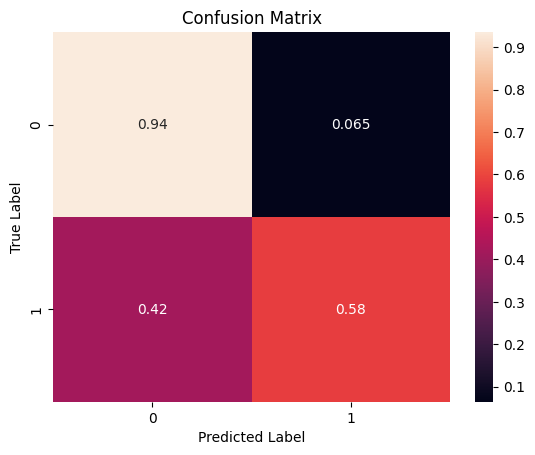

Accuracy: 0.8520361157177078
Precision: 0.735651033125615
Recall: 0.5832033281331254
F1 Score: 0.6506163886874547
Classification Report: 
               precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91     12435
        >50K       0.74      0.58      0.65      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281



In [49]:
# Confusion matrix
cmt = confusion_matrix(y_test, y_pred)
cmn = cmt.astype('float') / cmt.sum(axis=1)[:, np.newaxis]

sns.heatmap(cmn, annot=True)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Compute and print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='>50K'))
print("Recall:", recall_score(y_test, y_pred, pos_label='>50K'))
print("F1 Score:", f1_score(y_test, y_pred, pos_label='>50K'))

# Classification Report
print("Classification Report: \n", classification_report(y_test, y_pred))

# KNN

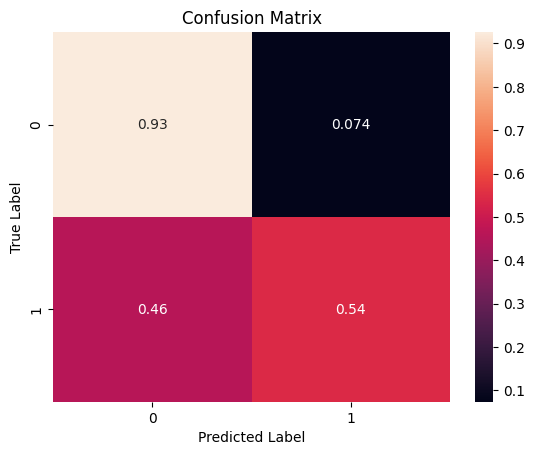

Accuracy: 0.8350838400589644
Precision: 0.6936936936936937
Recall: 0.5405616224648986
F1 Score: 0.607628233231039
Classification Report: 
               precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     12435
        >50K       0.69      0.54      0.61      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.73      0.75     16281
weighted avg       0.83      0.84      0.83     16281



In [ ]:
# Create a k-NN classifier with 20 neighbors and fit it to the training data
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Compute and print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='>50K'))
print("Recall:", recall_score(y_test, y_pred, pos_label='>50K'))
print("F1 Score:", f1_score(y_test, y_pred, pos_label='>50K'))

# Classification Report
print("Classification Report: \n", classification_report(y_test, y_pred))

# Decision tree

In [ ]:
# Create a Decision Tree classifier with and fit it to the training data
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)



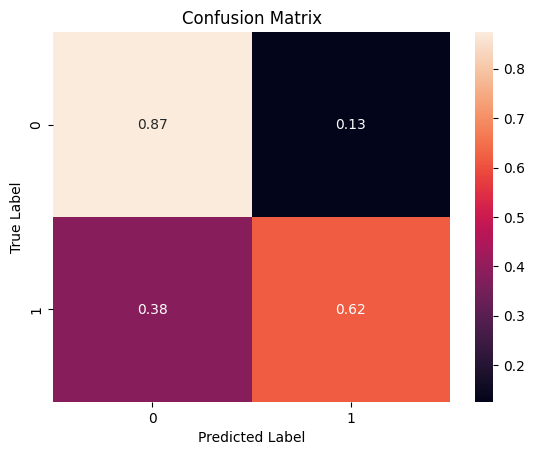

Accuracy: 0.8135249677538234
Precision: 0.6027918781725888
Recall: 0.6175247009880396
F1 Score: 0.6100693552530183
Classification Report: 
               precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88     12435
        >50K       0.60      0.62      0.61      3846

    accuracy                           0.81     16281
   macro avg       0.74      0.75      0.74     16281
weighted avg       0.82      0.81      0.81     16281



In [ ]:
# Confusion matrix
cmt = confusion_matrix(y_test, y_pred_tree)
cmn = cmt.astype('float') / cmt.sum(axis=1)[:, np.newaxis]

sns.heatmap(cmn, annot=True)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Compute and print metrics
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree, pos_label='>50K'))
print("Recall:", recall_score(y_test, y_pred_tree, pos_label='>50K'))
print("F1 Score:", f1_score(y_test, y_pred_tree, pos_label='>50K'))

# Classification Report
print("Classification Report: \n", classification_report(y_test, y_pred_tree))


# Result

Compare KNN, SVM and Decision Tree classifiers by evaluation metrics (F1-score, recall, precision, and accuracy) 

Accuracy :  SVM > KNN > Decesion Tree


Precision : SVM > KNN > Decesion Tree

Recall : Decesion Tree > SVM >  KNN 


F1-Score : SVM > Decesion Tree > KNN